In [ ]:
!pip install autogluon

import pandas as pd
import numpy as np

# 1. Load the training data
train_df_reproducible = pd.read_csv("/content/bankruptcy_Train.csv")
# 2. Load the test data
test_df_reproducible = pd.read_csv("/content/bankruptcy_Test_X.csv")

# 3. Replace infinite values with NaNs
train_df_reproducible.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df_reproducible.replace([np.inf, -np.inf], np.nan, inplace=True)

# 4. Define the list of financial attributes (Attr1-Attr64)
attr_cols = [f'Attr{i}' for i in range(1, 65)]

# 5. Apply np.arcsinh transformation to reduce skewness
train_df_reproducible[attr_cols] = np.arcsinh(train_df_reproducible[attr_cols])
test_df_reproducible[attr_cols] = np.arcsinh(test_df_reproducible[attr_cols])

# Display the first 5 rows of the transformed training dataframe
print("Transformed Training Data Head (Reproducible Pipeline):")
display(train_df_reproducible.head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.234310,0.083463,-0.083324,-1.648586,1.636467,-1.656848,0.249125,-0.299655,0.319268,NaN,...,-0.267856,0.111539,-0.00544,-0.01097,1.629444,-0.268164,0.269612,-0.277928,0.262949,0
1,0.270065,0.032684,-0.044885,0.263664,-0.265490,0.278063,0.268145,-0.299263,0.264205,-0.029476,...,-0.267846,0.012150,-0.00544,-0.01096,-0.277312,-0.284362,0.269988,-0.299732,0.255859,0
2,0.266485,-0.040439,-0.032614,0.263481,-0.265181,0.287416,0.266234,-0.298277,0.255879,-0.016469,...,-0.267856,0.002310,-0.00544,-0.00876,-0.277042,-0.257331,-1.652947,NaN,0.255036,0
3,NaN,-0.087747,0.094300,0.283978,NaN,0.301788,0.266070,-0.281786,0.256169,0.017079,...,-0.267846,0.000410,-0.00545,-0.01097,-0.277389,-0.288136,0.269515,1.636639,-1.634860,0
4,NaN,0.007970,0.009060,-1.648118,-0.264824,0.282767,0.273189,1.689046,0.265954,-0.019479,...,-0.267846,0.014310,-0.00545,-0.00663,-0.277042,-0.286533,0.269718,-0.289634,0.255811,0


# Task
Retrain the AutoGluon model with an extended training time of 4 hours, ensuring `autogluon` is installed, then generate a new `submission.csv` file, and display the ROC curve.

## Increase AutoGluon Training Time

### Subtask:
Modify the `predictor.fit` call in cell `0HvrdUYBMGRj` to increase the `time_limit` to 14400 seconds (4 hours).


In [ ]:
from autogluon.tabular import TabularPredictor

# Initialize the predictor with the target label and evaluation metric
predictor = TabularPredictor(label='class', eval_metric='roc_auc')

# Train the predictor using the training data and 'best_quality' presets with an extended time limit
predictor.fit(
    train_data=train_df_reproducible,
    presets='best_quality',
    time_limit=14400 # Extended time limit to 4 hours
)

print("AutoGluon training with extended time limit finished.")

# Display the leaderboard
print("Leaderboard for the newly trained model:")
leaderboard = predictor.leaderboard(silent=True)
display(leaderboard)

No path specified. Models will be saved in: "AutogluonModels/ag-20251203_175338"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       11.31 GB / 12.67 GB (89.2%)
Disk Space Avail:   63.16 GB / 107.72 GB (58.6%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_l

(_ray_fit pid=16417) [1000]	valid_set's binary_logloss: 0.125767


(_ray_fit pid=16417) 	Ran out of time, early stopping on iteration 1202. Best iteration is:
(_ray_fit pid=16417) 	[1105]	valid_set's binary_logloss: 0.125176
(_ray_fit pid=15971) 	Ran out of time, early stopping on iteration 172.


(_ray_fit pid=16557) [1000]	valid_set's binary_logloss: 0.126331
(_ray_fit pid=16614) [1000]	valid_set's binary_logloss: 0.139004
(_ray_fit pid=16720) [1000]	valid_set's binary_logloss: 0.120999
(_ray_fit pid=16869) [1000]	valid_set's binary_logloss: 0.143838


(_dystack pid=3178) 	0.8872	 = Validation score   (roc_auc)
(_dystack pid=3178) 	79.16s	 = Training   runtime
(_dystack pid=3178) 	1.35s	 = Validation runtime
(_dystack pid=3178) Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 1175.79s of remaining time.
(_dystack pid=3178) 	Ensemble Weights: {'LightGBM_BAG_L1': 0.4, 'XGBoost_BAG_L1': 0.2, 'CatBoost_r177_BAG_L1': 0.2, 'RandomForestGini_BAG_L1': 0.04, 'CatBoost_BAG_L1': 0.04, 'NeuralNetTorch_r79_BAG_L1': 0.04, 'LightGBM_r131_BAG_L1': 0.04, 'LightGBM_r96_BAG_L1': 0.04}
(_dystack pid=3178) 	0.9013	 = Validation score   (roc_auc)
(_dystack pid=3178) 	0.87s	 = Training   runtime
(_dystack pid=3178) 	0.0s	 = Validation runtime
(_dystack pid=3178) Fitting 108 L2 models, fit_strategy="sequential" ...
(_dystack pid=3178) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 1174.88s of the 1174.73s of remaining time.
(_dystack pid=3178) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFold

AutoGluon training with extended time limit finished.
Leaderboard for the newly trained model:


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.916832,roc_auc,23.610591,7140.283504,0.003902,1.857305,3,True,55
1,WeightedEnsemble_L2,0.913286,roc_auc,4.429853,2457.251736,0.003043,1.877900,2,True,32
2,LightGBM_r96_BAG_L2,0.912858,roc_auc,17.681972,5443.027720,0.462730,66.167631,2,True,49
3,CatBoost_r137_BAG_L2,0.912616,roc_auc,17.369811,5449.903464,0.150569,73.043375,2,True,53
4,CatBoost_r9_BAG_L2,0.912441,roc_auc,17.405544,6311.864233,0.186302,935.004143,2,True,48
5,CatBoost_BAG_L2,0.911863,roc_auc,17.335143,5508.112379,0.115901,131.252289,2,True,37
6,CatBoost_r177_BAG_L2,0.910794,roc_auc,17.339092,5506.914285,0.119851,130.054195,2,True,44
7,LightGBMXT_BAG_L2,0.909585,roc_auc,17.354961,5461.117424,0.135719,84.257334,2,True,33
8,LightGBM_r131_BAG_L2,0.906981,roc_auc,17.533062,5517.640167,0.313820,140.780077,2,True,46
9,XGBoost_r33_BAG_L2,0.906458,roc_auc,17.627965,5595.887546,0.408723,219.027456,2,True,51


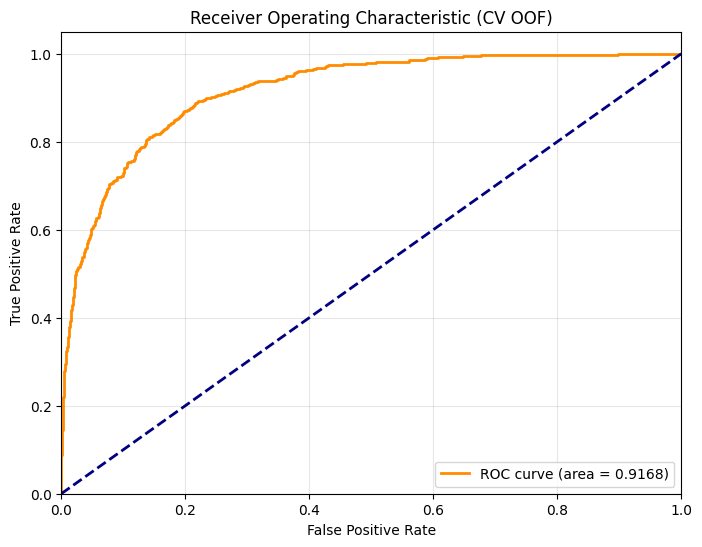


submission.csv generated successfully.


,ID,class
0,1,0.033421
1,2,0.001574
2,3,0.003578
3,4,0.034012
4,5,0.018286


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

# 1. Plot ROC Curve using OOF predictions (Cross-Validation performance)
try:
    # Get OOF probability predictions for the training data
    # This relies on the model being trained with bagging (best_quality preset)
    y_oof_pred_proba = predictor.predict_proba_oof()

    # Extract probabilities for the positive class (class 1)
    y_scores = y_oof_pred_proba[1]
    y_true = train_df_reproducible['class'] # Use train_df_reproducible for consistency with training data

    # Calculate FPR, TPR, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (CV OOF)')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()
except Exception as e:
    print(f"Could not plot ROC curve using OOF predictions: {e}")
    # Fallback: Evaluate on training data directly if OOF fails (less ideal but visualized)
    print("Attempting evaluation on training data for plotting...")
    try:
        y_pred_proba_train = predictor.predict_proba(train_df_reproducible)
        y_scores = y_pred_proba_train[1]
        y_true = train_df_reproducible['class']
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (Train Area = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title('Receiver Operating Characteristic (Training Data)')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e2:
        print(f"Failed to plot ROC curve: {e2}")

# 2. Generate Submission
# Predict probabilities for class 1 on the engineered test set
test_pred_proba = predictor.predict_proba(test_df_reproducible) # Use test_df_reproducible for consistency

# Create submission DataFrame
submission = pd.DataFrame({
    'ID': test_df_reproducible['ID'],
    'class': test_pred_proba[1]  # Probability of class 1
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("\nsubmission.csv generated successfully.")
display(submission.head())